In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import sys
import os
sys.path.append(os.path.abspath("../"))

# Load Dataset

In [17]:
# 📄 Setup Display
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [3]:
# 📥 Load Dataset
df = pd.read_csv("../data/games_selected.csv")

C:\Users\Yuurei\AppData\Local\Temp\ipykernel_39508\4199674303.py:2: DtypeWarning: Columns (0,4,5,6,7,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/games_selected.csv")


In [15]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,EstimatedOwnersAvg,Release Year
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0.0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,True,False,False,0,0,6,11,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",10000.0,2008.0
1,655370,Train Bandit,2017-10-12,0 - 20000,0.0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,False,0,0,53,5,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",10000.0,2017.0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0.0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,True,False,False,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,10000.0,2021.0
3,1355720,Henosis™,2020-07-23,0 - 20000,0.0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,True,0,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",10000.0,2020.0
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0.0,0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,True,True,False,0,0,50,8,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",10000.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111470,3600970,Paragon Of Time,2025-04-10,0 - 20000,0.0,0,2.99,0,"You stand at the edge of time, trying to save ...",['English'],[],NaN,TRUE,FALSE,FALSE,0,0,5,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro...",10000.0,2025.0
111471,3543710,A Few Days With : Hazel,2025-04-11,0 - 20000,0.0,0,2.69,0,"Join Hazel, an attractive young lady, and enjo...","['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,TRUE,FALSE,FALSE,0,0,0,0,0,0,Hentai Panda,Hentai Panda,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN,10000.0,2025.0
111472,3265370,MosGhost,2025-04-01,0 - 20000,0.0,0,7.99,0,Story : Andrei moved to Moscow for work and re...,"['English', 'Russian', 'French', 'Italian', 'G...",[],NaN,TRUE,FALSE,FALSE,0,0,24,12,0,0,Sinka Games,"Sinka Games,Arkuda Inc.","Single-player,Family Sharing",Simulation,"Simulation,Walking Simulator,Idler,First-Perso...",10000.0,2025.0
111473,3423620,AccuBow VR,2025-03-11,0 - 0,0.0,0,0,0,AccuBow VR: Master Realistic Archery in Immers...,['English'],['English'],NaN,TRUE,FALSE,FALSE,0,0,0,0,0,0,AccuBow LLC,AccuBow LLC,"Single-player,Tracked Controller Support,VR On...","Action,Adventure,Free To Play",NaN,0.0,2025.0


In [9]:
# 🧾 1. Struktur Data
print("🔹 Shape of Dataset:", df.shape)
display(df.head())
print("\n🔹 Column Info:")
print(df.info())
print("\n🔹 Missing Values:")
print(df.isnull().sum().sort_values(ascending=False))

🔹 Shape of Dataset: (111475, 26)


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,21-Oct-08,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,True,False,False,0,0,6,11,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,12-Oct-17,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,False,0,0,53,5,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,17-Nov-21,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,True,False,False,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,23-Jul-20,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,True,True,True,0,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,3-Feb-20,0 - 20000,0,0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,True,True,False,0,0,50,8,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."



🔹 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111475 entries, 0 to 111474
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   AppID                     111475 non-null  object
 1   Name                      111459 non-null  object
 2   Release date              111465 non-null  object
 3   Estimated owners          111464 non-null  object
 4   Peak CCU                  111464 non-null  object
 5   Required age              111464 non-null  object
 6   Price                     111463 non-null  object
 7   DiscountDLC count         111465 non-null  object
 8   About the game            104982 non-null  object
 9   Supported languages       111452 non-null  object
 10  Full audio languages      111452 non-null  object
 11  Reviews                   10636 non-null   object
 12  Windows                   111451 non-null  object
 13  Mac                       111452 non-null  

# Graph

In [10]:
# 📊 2. Target Variable Exploration — Estimated Owners & Peak CCU
# → Convert 'Estimated owners' range to average value
def parse_estimated_owners(row):
    try:
        min_o, max_o = row.split(" - ")
        return (int(min_o.replace(",", "")) + int(max_o.replace(",", ""))) // 2
    except:
        return np.nan
    
df["EstimatedOwnersAvg"] = df["Estimated owners"].apply(parse_estimated_owners)
df["Peak CCU"] = pd.to_numeric(df["Peak CCU"], errors="coerce")

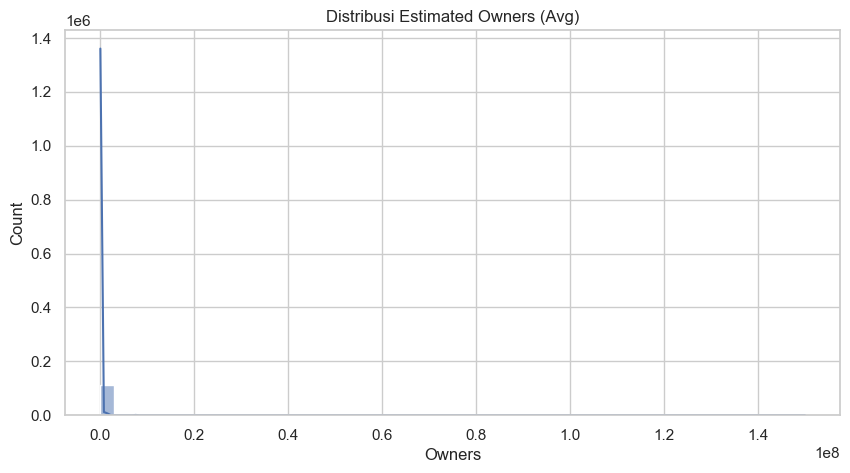

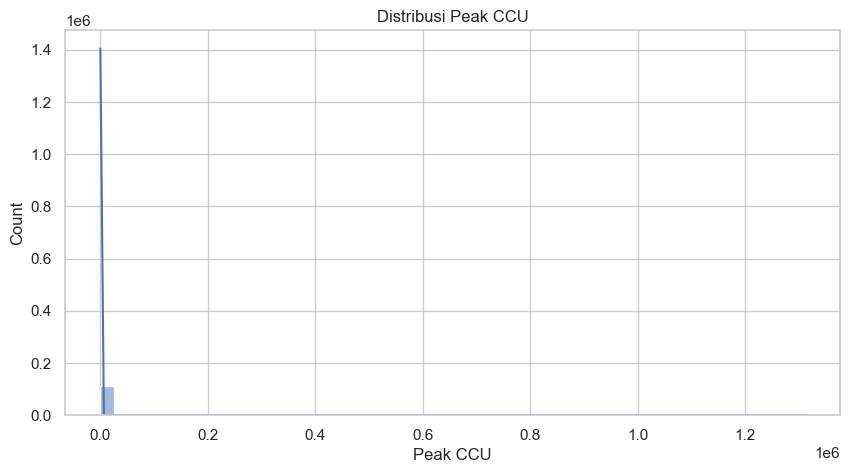

In [11]:
# Visualisasi distribusi
plt.figure(figsize=(10, 5))
sns.histplot(df["EstimatedOwnersAvg"].dropna(), bins=50, kde=True)
plt.title("Distribusi Estimated Owners (Avg)")
plt.xlabel("Owners")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["Peak CCU"].dropna(), bins=50, kde=True)
plt.title("Distribusi Peak CCU")
plt.xlabel("Peak CCU")
plt.show()

In [16]:
numeric_cols = ["EstimatedOwnersAvg", "Peak CCU", "Price", "Required age", "Average playtime forever", "Median playtime forever"]
for col in numeric_cols:
    print(f"{col} - unique types: {df[col].apply(type).unique()}")
    print(df[col].unique()[:5])  # Lihat sebagian isi kolom

EstimatedOwnersAvg - unique types: [<class 'float'>]
[ 10000.  75000.  35000. 350000. 150000.]
Peak CCU - unique types: [<class 'float'>]
[ 0. 68.  3.  2.  1.]
Price - unique types: [<class 'float'> <class 'str'>]
[19.99 0.99 4.99 5.99 0.0]
Required age - unique types: [<class 'int'> <class 'str'> <class 'float'>]
[0 17 18 10 13]
Average playtime forever - unique types: [<class 'int'> <class 'str'> <class 'float'>]
[0 703 67 224 11]
Median playtime forever - unique types: [<class 'int'> <class 'str'> <class 'float'>]
[0 782 93 257 11]


In [17]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

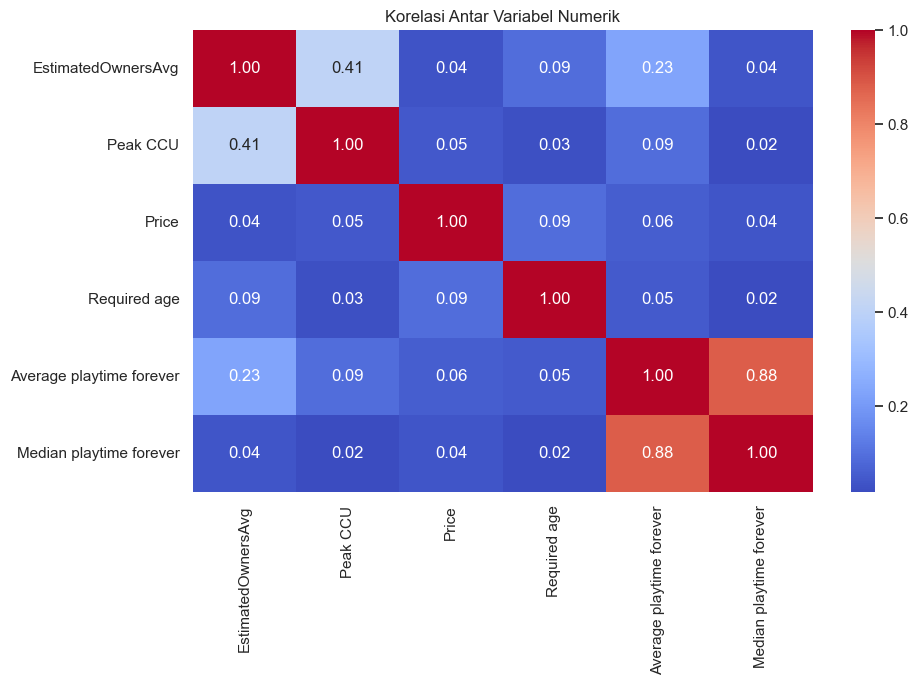

In [18]:
# 📈 3. Korelasi Awal
numeric_cols = ["EstimatedOwnersAvg", "Peak CCU", "Price", "Required age", "Average playtime forever", "Median playtime forever"]
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

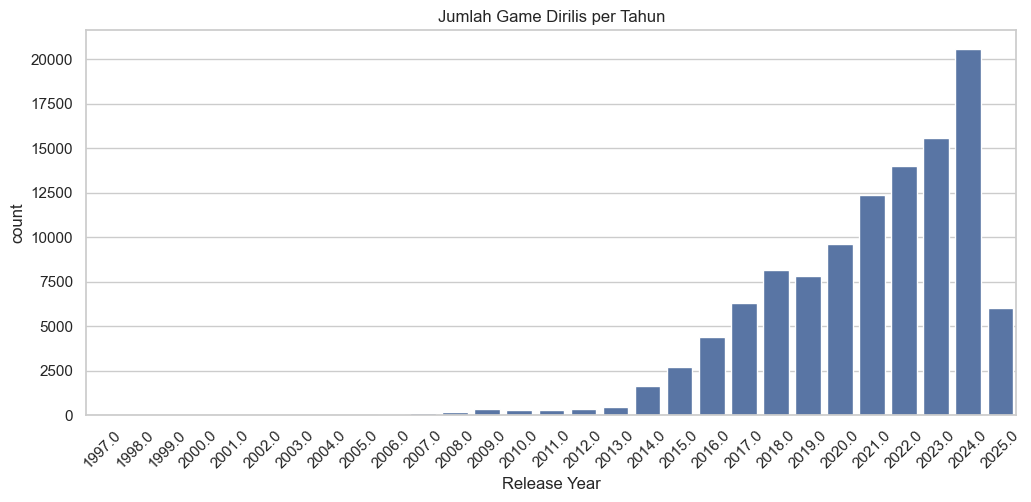

In [20]:
# 📅 4. Analisis Waktu Rilis
df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")
df["Release Year"] = df["Release date"].dt.year

plt.figure(figsize=(12, 5))
sns.countplot(x="Release Year", data=df, order=sorted(df["Release Year"].dropna().unique()))
plt.title("Jumlah Game Dirilis per Tahun")
plt.xticks(rotation=45)
plt.show()

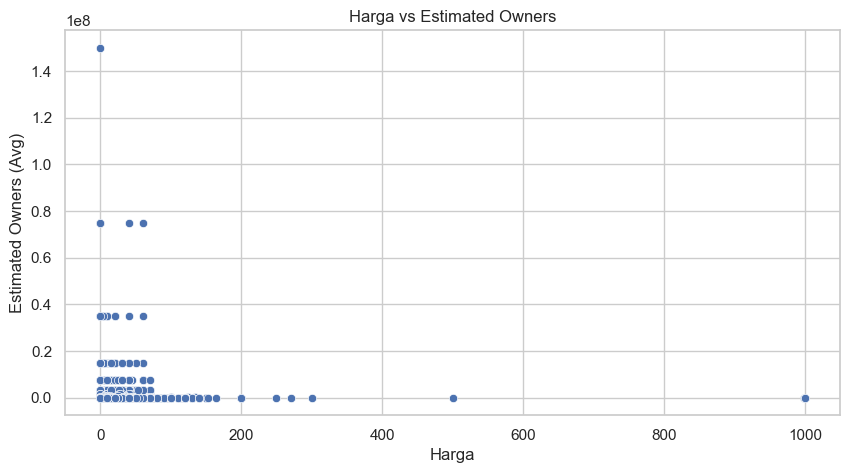

In [21]:
# 💲 5. Harga vs Popularitas
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Price", y="EstimatedOwnersAvg", data=df)
plt.title("Harga vs Estimated Owners")
plt.xlabel("Harga")
plt.ylabel("Estimated Owners (Avg)")
plt.show()

In [74]:
# Mengatur agar NumPy tidak memotong output array
np.set_printoptions(threshold=np.inf)

# Sekarang semua nilai unik akan ditampilkan
print("berikut merupakan isi dari Price:\n", df["Price"].unique())

# Jangan lupa untuk mengembalikannya ke pengaturan default jika diperlukan
np.set_printoptions()

berikut merupakan isi dari Price:
 [19.99 0.99 4.99 5.99 0.0 10.99 9.99 14.99 3.99 23.99 1.99 2.99 12.99 7.99
 9.59 17.99 37.49 13.99 11.99 2.49 59.99 0.55 3.49 6.99 7.49 29.99 4.24
 0.49 24.99 1.19 5.39 44.99 16.24 8.49 0.74 39.99 4.2 16.99 12.59 0.69
 8.99 2.39 0.59 15.99 2.69 49.99 1.49 2.0 0.51 15.0 1.79 1.13 1.64 0.5
 2.79 0.79 2.59 34.99 10.79 2.44 64.99 1.69 10.49 8.39 6.39 3.5 1.03 3.24
 3.74 1.09 6.69 0.9 199.99 2.09 17.49 0.54 18.99 6.49 1.47 2.3 6.79 1.24
 0.89 19.9 5.0 4.8 4.96 8.98 4.0 6.29 4.19 21.99 0.67 1.89 31.99 3.59
 54.99 1.74 8.44 13.49 0.65 0.66 5.09 20.99 99.99 1.29 4.49 4.79 3.44
 79.99 3.89 1.39 12.49 7.19 11.89 1.31 11.24 5.94 69.99 74.99 10.39 1.59
 12.95 9.95 12.74 4.31 0.91 9.9 2.19 64.95 6.74 1.23 89.99 9.09 5.29 18.74
 4.07 5.19 4.3 6.24 8.0 1.43 1.5 2.29 3.86 14.49 0.53 2.24 3.37 7.79 1.45
 5.24 9.0 3.39 11.69 4.93 4.88 4.39 4.89 149.99 22.49 5.59 1.94 6.02 19.49
 27.99 11.04 20.0 19.96 38.49 4.54 1.04 3.73 1.35 19.79 3.19 0.64 3.33
 7.91 7.58 26.79 5.35

In [28]:
# 1. Buat mask untuk mengidentifikasi baris di mana 'Price' bukan angka
#    pd.to_numeric dengan errors='coerce' mengubah teks menjadi NaN.
#    .isna() akan menghasilkan True untuk nilai NaN tersebut.
mask_bukan_angka = pd.to_numeric(df['Price'], errors='coerce').isna()

# 2. Gunakan mask tersebut untuk menampilkan hanya baris yang bermasalah
#    Tidak perlu tanda ~, karena kita ingin melihat baris di mana mask-nya True.
baris_bermasalah = df[mask_bukan_angka]

print(baris_bermasalah)

                                                    AppID  \
75724   ��次数。 3、铜钱的基础数量会随着玩家等级的提升而增加。 4、提升Vip等级可以增加铜钱获...   
79460   ��命奇御二Fate Seeker II，使命召唤2，合金弹头X，跳跃之王，仙境传説，嗜血印...   
79461   �界汽车拉力锦标赛6，特里贡：太空故事，与君盟，奥威尔：注视着你，Re:Legend，Ele...   
79486   ！重製版，Have a Nice Death，寶石爭霸：霜之怒，終極街頭霸王4：街機版，終極...   
79487   華倫西亞傳説：索非亞的重生，軒轅劍外傳穹之扉，Animal Shelter: Prologu...   
82884   ��追踪》重制版，奥日与黑暗森林，主播女孩重度依赖，植物大战殭尸™: 和睦小镇保衞战，狂野西...   
82885   英雄，猫力婚介所，奥威尔：注视着你，子夜捉鬼，王牌对决，亡国的骑士与星之巫女，腐烂国度，喜剧...   
83386                                               ��角游戏   
84536   �使魔女，Clickteam Fusion 2.5，Len's Island，冰冷海域，真・...   
84537   ��塔防，奴役：西游记，进化之地：传奇版，王国围攻，神偷2：金属时代，闪避刺客，恐龙乐园，厕...   
92051   a͂l̨̖̰̠̻̯͇̬̒̎̀ͯ͒̇͝͠_̷̸̢̮̞̞̠̰̫̙͖̖̱̮͌̽̋ͬͧ̈́̆̾̀͟͡...   
92052   ̸̴̧̣̥͔̣̠͔̙̠̦̟̩̪̠͈̜͂͒̄́̅͛̀̇͂ͥͥͣ̚͢͞_̸̨ͫͫ͋̾e̡͉̳͍͖...   
92053   �̷̷̶̫̲͕̱͌̓̈̃̽͝ T̶̢̛̛̛̫͕̻͚͈̬̰͊̋͐͌ͤ̿̔̀͗̈́͐̾̅͟͞͞ͅ...   
92054   �̙̭̋ͩ͌̑ͯ̂̅v͙̱̙̻ͅe͎̹̗̎͋̍ͮͧ̔ͯ̈́̀͟͜͟Z̫_̢̛̖͎̻ͣ̿̽͂̀...   
92055   ̡̢̪͎̬̺̰͑̅̓̽̋͂̏͝͝ͅo̴̵̧̨̧̲̙͓̱̱̘̿ͧ̐ͭ͐̉̾̑ͪͦ̉̏̃͘͟͝ͅ...   
92056   ̡̮̼̹̤̋̒ͭ̑̒͂̑ͬ͂ͦ͞

In [29]:
# 2. Identifikasi baris yang 'Price'-nya bukan angka
# errors='coerce' akan mengubah nilai non-numerik menjadi NaN (Not a Number)
# .isna() akan menghasilkan True untuk setiap baris yang nilainya NaN
mask_bukan_angka = pd.to_numeric(df['Price'], errors='coerce').isna()

# 3. Ambil hanya baris yang BUKAN merupakan baris yang salah
# Tanda ~ (tilde) berarti "NOT" atau kebalikan.
# Jadi, kita memilih baris di mana mask_bukan_angka adalah False.
df_bersih = df[~mask_bukan_angka].copy()
df = df_bersih

In [30]:
# Mengatur agar NumPy tidak memotong output array
np.set_printoptions(threshold=np.inf)

# Sekarang semua nilai unik akan ditampilkan
print("berikut merupakan isi dari Price:\n", df_bersih["Price"].unique())

df['Price'] = df['Price'].astype(float)

berikut merupakan isi dari Price:
 [19.99 0.99 4.99 5.99 0.0 10.99 9.99 14.99 3.99 23.99 1.99 2.99 12.99 7.99
 9.59 17.99 37.49 13.99 11.99 2.49 59.99 0.55 3.49 6.99 7.49 29.99 4.24
 0.49 24.99 1.19 5.39 44.99 16.24 8.49 0.74 39.99 4.2 16.99 12.59 0.69
 8.99 2.39 0.59 15.99 2.69 49.99 1.49 2.0 0.51 15.0 1.79 1.13 1.64 0.5
 2.79 0.79 2.59 34.99 10.79 2.44 64.99 1.69 10.49 8.39 6.39 3.5 1.03 3.24
 3.74 1.09 6.69 0.9 199.99 2.09 17.49 0.54 18.99 6.49 1.47 2.3 6.79 1.24
 0.89 19.9 5.0 4.8 4.96 8.98 4.0 6.29 4.19 21.99 0.67 1.89 31.99 3.59
 54.99 1.74 8.44 13.49 0.65 0.66 5.09 20.99 99.99 1.29 4.49 4.79 3.44
 79.99 3.89 1.39 12.49 7.19 11.89 1.31 11.24 5.94 69.99 74.99 10.39 1.59
 12.95 9.95 12.74 4.31 0.91 9.9 2.19 64.95 6.74 1.23 89.99 9.09 5.29 18.74
 4.07 5.19 4.3 6.24 8.0 1.43 1.5 2.29 3.86 14.49 0.53 2.24 3.37 7.79 1.45
 5.24 9.0 3.39 11.69 4.93 4.88 4.39 4.89 149.99 22.49 5.59 1.94 6.02 19.49
 27.99 11.04 20.0 19.96 38.49 4.54 1.04 3.73 1.35 19.79 3.19 0.64 3.33
 7.91 7.58 26.79 5.35

In [93]:
df_clean.unique

<bound method Series.unique of 0         19.99
1          0.99
2          4.99
3          5.99
4          0.00
          ...  
111470     2.99
111471     2.69
111472     7.99
111473     0.00
111474     9.99
Name: Price, Length: 111452, dtype: float64>

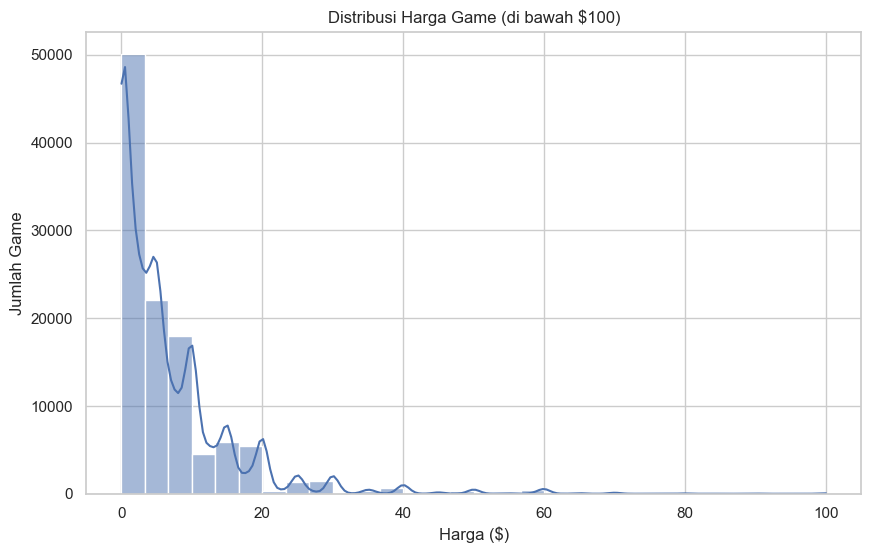

In [111]:
# Membuat histogram untuk harga (misalnya, di bawah $100)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Price'] < 100]['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Game (di bawah $100)')
plt.xlabel('Harga ($)')
plt.ylabel('Jumlah Game')
plt.show()

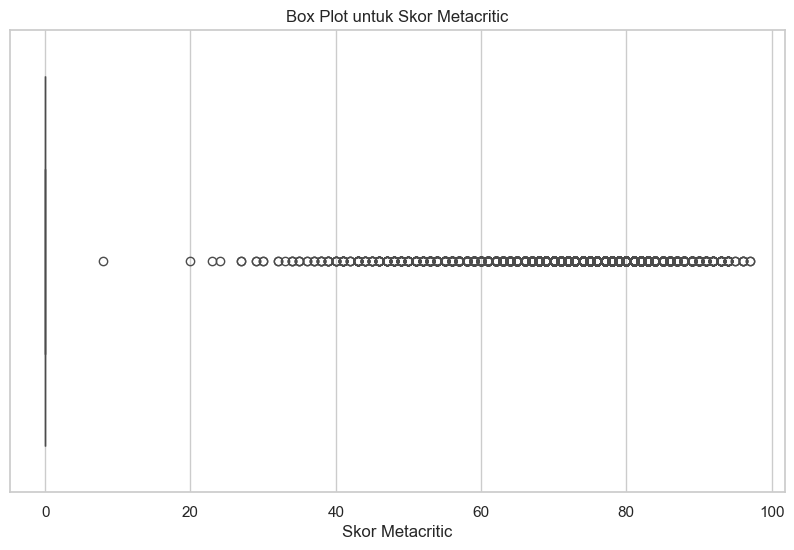

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Metacritic score'])
plt.title('Box Plot untuk Skor Metacritic')
plt.xlabel('Skor Metacritic')
plt.show()

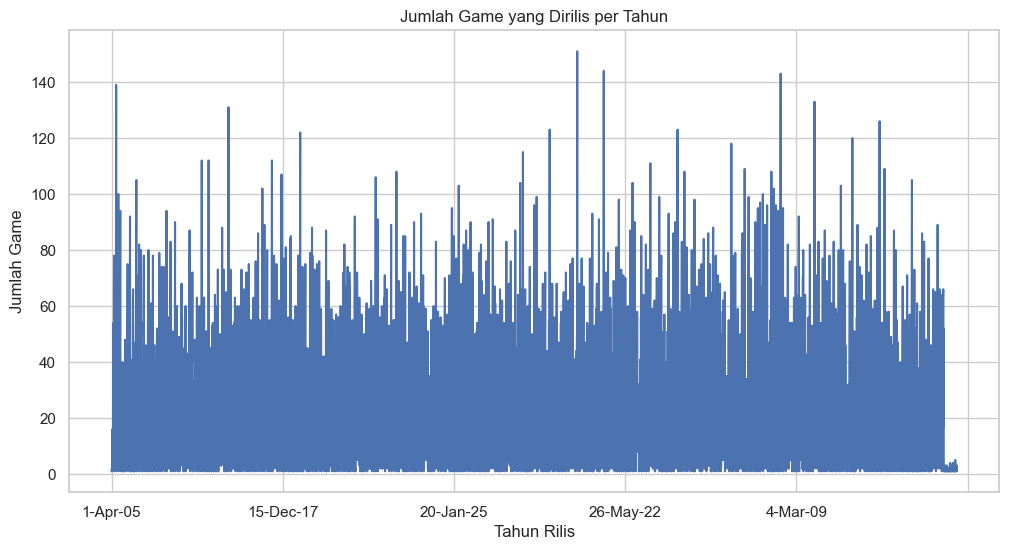

In [113]:
# Menghitung jumlah game yang dirilis per tahun
games_per_year = df['Release date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='line')
plt.title('Jumlah Game yang Dirilis per Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Game')
plt.grid(True)
plt.show()

In [15]:
# Menghindari pembagian dengan nol
df['Total Reviews'] = df['Positive'] + df['Negative']
df['Positive Ratio'] = df.apply(lambda row: row['Positive'] / row['Total Reviews'] if row['Total Reviews'] > 0 else 0, axis=1)

print(df[['Name', 'Positive Ratio']].sort_values(by='Positive Ratio', ascending=True).head(30))

                                             Name  Positive Ratio
111456                               Coin x Union             0.0
53                         Eternal Edge+ Prologue             0.0
52                                 Pool Adventure             0.0
7              Legend of Rome - The Wrath of Mars             0.0
56863                              Drone Showcase             0.0
93915                      Silent Sonata Playtest             0.0
111465                                    PlanetX             0.0
93912                                Let Him Cook             0.0
93911                                恐龙岛 Playtest             0.0
93910                     Project Heaven Playtest             0.0
93909                                  Astro Wars             0.0
93908                             Project Phoenix             0.0
29      邻居大叔/UncleNeighbor:uncle Dating Simulator             0.0
93905                     Sunshine In Woozaville!             0.0
93904     

In [9]:
# Mengatur agar NumPy tidak memotong output array
np.set_printoptions(threshold=np.inf)

# Sekarang semua nilai unik akan ditampilkan
print("berikut merupakan isi dari Positive:\n", df["Positive"].unique())

# Jangan lupa untuk mengembalikannya ke pengaturan default jika diperlukan
np.set_printoptions()

berikut merupakan isi dari Positive:
 [6 53 0 3 50 87 21 76 225 589 147 5 36 100 349 17 2046 61 29 1490 4 392 37
 18 38 24 23 11 8 16 258 1 7 35 2014 168 55 1716 698 138 2 100620 60 69
 122539 10 283 328 9516 180 11739 51 31 15 20 102 207 12 44 4278 82902 245
 82 288 124 4181 164 3075 2108 80 2083 242 41425 26 14 68 79 25 16788 9 33
 72 73 20432 41 65 1640 13 332 420 58 1078 2113 185 115 71 54 646 900 94
 32 63 46 48 388 546 770 1802 34 671 27 293 116 152 3942 66 42 5491 85 47
 237 57 83 59 22 1426 95 421 250 106 52 351 189 49 19 205 1438 298 98 2461
 654 1079 131 30 409 319 573 846 2535 110 427 108 113 7129 181 559 40 117
 148 656 184 67 1845 19370 2509 474 291 39 70 175 93 136 3087 74 128 37900
 1852 104 2479 851 3383 139 264 228 544 564 43 13145 370 494 1961 28 426
 77 239 311 927 708 96 155 197 755 428 713 816 587 2657 182 4930 276 529
 2566 568 28651 8436 236 45 123 434 1144 241 157 348 1239 64 415524 1840
 89 19580 3578 146 424 4959 2574 623 5684 365 122 440 313 156 195 3145 541


In [12]:
df['Positive'] = df['Positive'].fillna(0).astype(int)
df['Negative'] = df['Negative'].fillna(0).astype(int)

In [ ]:
df.dtypes

In [19]:
print(df.dtypes)

AppID                       object
Name                        object
Release date                object
Estimated owners            object
Peak CCU                    object
Required age                object
Price                       object
DiscountDLC count           object
About the game              object
Supported languages         object
Full audio languages        object
Reviews                     object
Windows                     object
Mac                         object
Linux                       object
Metacritic score            object
User score                  object
Positive                    object
Negative                    object
Average playtime forever    object
Median playtime forever     object
Developers                  object
Publishers                  object
Categories                  object
Genres                      object
Tags                        object
dtype: object


# IMPORTANT

In [50]:
numerical_summary = df.describe()
print(numerical_summary)

          AppID                                           Name Release date  \
count    111475                                         111459       111465   
unique   111475                                         110334         4950   
top     3183790  Shadow of the Tomb Raider: Definitive Edition    24-Oct-24   
freq          1                                             20          151   

       Estimated owners  Peak CCU  Required age   Price  DiscountDLC count  \
count            111464    111464        111464  111463             111465   
unique               24      2254            40    1082                143   
top           0 - 20000         0             0       0                  0   
freq              70206     47733         64102   12210              55182   

                                           About the game Supported languages  \
count                                              104982              111452   
unique                                             

In [51]:
# Menentukan jumlah top-n yang ingin ditampilkan
n = 10

# Menampilkan top-n value counts untuk kolom 'Genres'
top_genres = df['Genres'].value_counts().head(n)
print("Top {} Genres:".format(n))
print(top_genres)
print("\n" + "="*30 + "\n")

# Menampilkan top-n value counts untuk kolom 'Tags'
top_tags = df['Tags'].value_counts().head(n)
print("Top {} Tags:".format(n))
print(top_tags)
print("\n" + "="*30 + "\n")

# Menampilkan top-n value counts untuk kolom 'Developers'
top_developers = df['Developers'].value_counts().head(n)
print("Top {} Developers:".format(n))
print(top_developers)

Top 10 Genres:
Genres
Casual,Indie              6240
Action,Indie              5172
Action,Adventure,Indie    4578
Adventure,Indie           3897
Adventure,Casual,Indie    3266
Casual                    3190
Indie                     3146
Action,Casual,Indie       3069
Action                    2866
Adventure                 1954
Name: count, dtype: int64


Top 10 Tags:
Tags
Indie,Casual                      302
Action,Indie                      283
Adventure,Casual,Hidden Object    268
Action,Indie,Casual               230
Indie                             126
Casual                            124
Action,Indie,Adventure            105
Action,Adventure,Indie             84
Casual,Indie                       72
Indie,Casual,Puzzle                67
Name: count, dtype: int64


Top 10 Developers:
Developers
EroticGamesClub                     216
Choice of Games                     166
Laush Dmitriy Sergeevich            149
Boogygames Studios                  145
Creobit                 

In [52]:
# Menghitung dan menampilkan jumlah missing values per kolom
missing_values = df.isna().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
AppID                            0
Name                            16
Release date                    10
Estimated owners                11
Peak CCU                        11
Required age                    11
Price                           12
DiscountDLC count               10
About the game                6493
Supported languages             23
Full audio languages            23
Reviews                     100839
Windows                         24
Mac                             23
Linux                           24
Metacritic score                24
User score                      23
Positive                        23
Negative                        23
Average playtime forever        24
Median playtime forever         24
Developers                    6500
Publishers                    6803
Categories                    7591
Genres                        6465
Tags                         37438
dtype: int64


In [53]:
# Menampilkan tipe data dari kolom 'Price'
price_dtype = df['Price'].dtype
print(f"Tipe data kolom 'Price': {price_dtype}")

# Menampilkan tipe data dari kolom 'Required age'
required_age_dtype = df['Required age'].dtype
print(f"Tipe data kolom 'Required age': {required_age_dtype}")

Tipe data kolom 'Price': object
Tipe data kolom 'Required age': object


In [54]:
# Memeriksa tipe data dari entri pertama di kolom 'Genres'
if not df['Genres'].empty:
    first_genre_type = type(df['Genres'].iloc[0])
    print(f"Tipe data entri pertama di kolom 'Genres': {first_genre_type}")
    if first_genre_type == list:
        print("✅ Kolom 'Genres' tampaknya sudah diparse menjadi list.")
    else:
        print("❌ Kolom 'Genres' belum diparse menjadi list.")
else:
    print("Kolom 'Genres' kosong.")

print("-" * 20)

# Memeriksa tipe data dari entri pertama di kolom 'Tags'
if not df['Tags'].empty:
    first_tag_type = type(df['Tags'].iloc[0])
    print(f"Tipe data entri pertama di kolom 'Tags': {first_tag_type}")
    if first_tag_type == list:
        print("✅ Kolom 'Tags' tampaknya sudah diparse menjadi list.")
    else:
        print("❌ Kolom 'Tags' belum diparse menjadi list.")
else:
    print("Kolom 'Tags' kosong.")

Tipe data entri pertama di kolom 'Genres': <class 'str'>
❌ Kolom 'Genres' belum diparse menjadi list.
--------------------
Tipe data entri pertama di kolom 'Tags': <class 'str'>
❌ Kolom 'Tags' belum diparse menjadi list.


In [55]:
# Memeriksa tipe data kolom 'Release date'
release_date_dtype = df['Release date'].dtype
print(f"Tipe data kolom 'Release date': {release_date_dtype}")

if 'datetime64' in str(release_date_dtype):
    print("✅ Kolom 'Release date' sudah berformat datetime.")
else:
    print("❌ Kolom 'Release date' belum diubah ke format datetime.")

# Memeriksa keberadaan kolom 'release_year'
if 'release_year' in df.columns:
    print("✅ Kolom 'release_year' sudah dibuat.")
    # Opsional: Tampilkan beberapa nilai pertama
    print("Contoh nilai 'release_year':")
    print(df['release_year'].head())
else:
    print("❌ Kolom 'release_year' belum dibuat.")

Tipe data kolom 'Release date': object
❌ Kolom 'Release date' belum diubah ke format datetime.
❌ Kolom 'release_year' belum dibuat.


# Info

In [47]:
print(df["Estimated owners"].value_counts())

Estimated owners
0 - 20000                                                                                                                                                                                  70206
0 - 0                                                                                                                                                                                      22091
20000 - 50000                                                                                                                                                                               8277
50000 - 100000                                                                                                                                                                              4068
100000 - 200000                                                                                                                                                                             2664
200000 - 500000   

In [25]:
def parse_estimated_owners(x):
    try:
        if isinstance(x, str) and re.match(r"^\d[\d,]*\s*-\s*\d[\d,]*$", x.strip()):
            parts = x.replace(",", "").split("-")
            return (int(parts[0].strip()) + int(parts[1].strip())) // 2
    except:
        return None
    return None

df["EstimatedOwnersAvg"] = df["Estimated owners"].apply(parse_estimated_owners)

In [27]:
print(df["EstimatedOwnersAvg"].value_counts())

EstimatedOwnersAvg
10000.0        70206
0.0            22091
35000.0         8277
75000.0         4068
150000.0        2664
350000.0        2206
750000.0         921
1500000.0        525
3500000.0        336
7500000.0         93
15000000.0        38
35000000.0        21
75000000.0         5
150000000.0        1
Name: count, dtype: int64


In [28]:
numeric_cols = ["EstimatedOwnersAvg", "Peak CCU", "Price", "Required age", "Average playtime forever", "Median playtime forever"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"{col}:\n{df[col].describe()}\n")

EstimatedOwnersAvg:
count    1.114520e+05
mean     6.864215e+04
std      9.270899e+05
min      0.000000e+00
25%      1.000000e+04
50%      1.000000e+04
75%      1.000000e+04
max      1.500000e+08
Name: EstimatedOwnersAvg, dtype: float64

Peak CCU:
count    1.114520e+05
mean     1.777215e+02
std      8.390462e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.311366e+06
Name: Peak CCU, dtype: float64

Price:
count    111452.000000
mean          7.061568
std          12.563246
min           0.000000
25%           0.990000
50%           3.990000
75%           9.990000
max         999.980000
Name: Price, dtype: float64

Required age:
count    111452.000000
mean          0.254208
std           2.035653
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: Required age, dtype: float64

Average playtime forever:
count    111439.000000
mean         81.256768
std         999.99

In [29]:
df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")
df["release_year"] = df["Release date"].dt.year
print(df["release_year"].value_counts().sort_index())

release_year
1997.0        2
1998.0        1
1999.0        3
2000.0        2
2001.0        4
2002.0        1
2003.0        3
2004.0        7
2005.0        7
2006.0       69
2007.0      109
2008.0      176
2009.0      339
2010.0      300
2011.0      286
2012.0      356
2013.0      490
2014.0     1627
2015.0     2683
2016.0     4407
2017.0     6324
2018.0     8166
2019.0     7810
2020.0     9631
2021.0    12376
2022.0    13979
2023.0    15543
2024.0    20583
2025.0     6037
Name: count, dtype: int64


In [30]:
print("Top Genres:")
print(df["Genres"].value_counts().head(10))

print("Top Developers:")
print(df["Developers"].value_counts().head(10))

print("Top Tags (before split):")
print(df["Tags"].value_counts().head(10))

Top Genres:
Genres
Casual,Indie              6240
Action,Indie              5172
Action,Adventure,Indie    4578
Adventure,Indie           3897
Adventure,Casual,Indie    3266
Casual                    3190
Indie                     3146
Action,Casual,Indie       3069
Action                    2866
Adventure                 1954
Name: count, dtype: int64
Top Developers:
Developers
EroticGamesClub                     216
Choice of Games                     166
Laush Dmitriy Sergeevich            149
Boogygames Studios                  145
Creobit                             138
Hosted Games                        114
KOEI TECMO GAMES CO., LTD.          108
Sokpop Collective                   105
Atomic Fabrik,Cristian Manolachi     99
Reforged Group                       96
Name: count, dtype: int64
Top Tags (before split):
Tags
Indie,Casual                      302
Action,Indie                      283
Adventure,Casual,Hidden Object    268
Action,Indie,Casual               230
Indie     

In [45]:
df["Tags"].apply(type).value_counts()
df["Tags"].dropna().unique()[:10]

TypeError: unhashable type: 'list'

In [43]:
def parse_tag_string(x):
    if pd.isna(x):
        return []
    if isinstance(x, str):
        return [tag.strip() for tag in x.split(",") if tag.strip()]
    return []

df["Tags"] = df["Tags"].apply(parse_tag_string)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [44]:
all_tags = df["Tags"].explode()
print("Most Common Tags:")
print(all_tags.value_counts())

Most Common Tags:
Tags
Indie                                                                                                                 44892
Singleplayer                                                                                                          40921
Action                                                                                                                32863
Casual                                                                                                                31744
Adventure                                                                                                             31081
                                                                                                                      ...  
坦克游戏                                                                                                                      1
we'll see you next week ~ ---- [2024-0519] ---- This week's diary: 1. Regarding the development progress this

In [42]:
df["Tags"].to_csv("../data/tags_exploded.csv", index=False)

In [31]:
df["Tags"] = df["Tags"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
all_tags = df["Tags"].explode()
print("Most Common Tags:")
print(all_tags.value_counts().head(10))

ValueError: malformed node or string on line 1: <ast.Name object at 0x0000022F50E7B940>

In [32]:
df["desc_length"] = df["About the game"].astype(str).apply(len)
print(df["desc_length"].describe())

count    111475.000000
mean       1187.400888
std         980.653816
min           1.000000
25%         590.000000
50%         975.000000
75%        1540.000000
max       32757.000000
Name: desc_length, dtype: float64


In [33]:
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

Reviews                     100839
Tags                         37438
Categories                    7591
Publishers                    6803
Developers                    6500
About the game                6493
Genres                        6465
Release Year                   154
Release date                   154
release_year                   154
Average playtime forever        36
Median playtime forever         36
Windows                         24
Linux                           24
Metacritic score                24
Supported languages             23
Required age                    23
Peak CCU                        23
Price                           23
Full audio languages            23
Positive                        23
Negative                        23
Mac                             23
User score                      23
EstimatedOwnersAvg              23
Name                            16
Estimated owners                11
DiscountDLC count               10
dtype: int64


In [34]:
print(df[["Windows", "Mac", "Linux"]].astype(bool).sum())

Windows    111449
Mac         59826
Linux       55357
dtype: int64


In [12]:
from src.preprocessing import preprocess

df_raw = pd.read_csv("../data/games_selected.csv")
df_clean = preprocess(df_raw, use_text_embedding=False)

C:\Users\Yuurei\AppData\Local\Temp\ipykernel_39508\811488887.py:3: DtypeWarning: Columns (0,4,5,6,7,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("../data/games_selected.csv")
d:\Repo\DATATHON\steam_game_popularity_predictor\src\preprocessing.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")


In [5]:
df_clean.dtypes

Peak CCU                      int64
Required age                  int64
Price                       float64
DiscountDLC count            object
Positive                      int64
Negative                      int64
Average playtime forever    float64
Median playtime forever     float64
Developers                   object
Publishers                   object
Categories                   object
Genres                       object
Tags                         object
EstimatedOwnersAvg            int64
release_year                float64
dtype: object

In [6]:
df_clean

,Peak CCU,Required age,Price,DiscountDLC count,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,EstimatedOwnersAvg,release_year
0,0,0,19.99,0,6,11,0.0,0.0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",10000,2008.0
1,0,0,0.99,0,53,5,0.0,0.0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",10000,2017.0
2,0,0,4.99,0,0,0,0.0,0.0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",[],10000,2021.0
3,0,0,5.99,0,3,0,0.0,0.0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",10000,2020.0
4,0,0,0.00,0,50,8,0.0,0.0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",10000,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111470,0,0,2.99,0,5,0,0.0,0.0,Webcess,Webcess,"[Single-player, Full controller support, Steam...","[Action, Casual, Indie]","[Action Roguelike, Bullet Hell, Hack and Slash...",10000,2025.0
111471,0,0,2.69,0,0,0,0.0,0.0,Hentai Panda,Hentai Panda,"[Single-player, Steam Achievements, Steam Clou...","[Casual, Indie]",[],10000,2025.0
111472,0,0,7.99,0,24,12,0.0,0.0,Sinka Games,"Sinka Games,Arkuda Inc.","[Single-player, Family Sharing]",[Simulation],"[Simulation, Walking Simulator, Idler, First-P...",10000,2025.0
111473,0,0,0.00,0,0,0,0.0,0.0,AccuBow LLC,AccuBow LLC,"[Single-player, Tracked Controller Support, VR...","[Action, Adventure, Free To Play]",[],0,2025.0


In [31]:
print(df["Estimated owners"].value_counts())

Estimated owners
0 - 20000                70206
0 - 0                    22091
20000 - 50000             8277
50000 - 100000            4068
100000 - 200000           2664
200000 - 500000           2206
500000 - 1000000           921
1000000 - 2000000          525
2000000 - 5000000          336
5000000 - 10000000          93
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         5
100000000 - 200000000        1
Name: count, dtype: int64


In [25]:

sample = pd.Series(["0 - 20000", "abc", "50000 - 100000", "100 - ", None])

def is_valid_owner_range(value):
    if isinstance(value, str):
        return bool(re.match(r"^\d+\s*-\s*\d+$", value.strip()))
    return False

print(sample.apply(is_valid_owner_range))

0     True
1    False
2     True
3    False
4    False
dtype: bool


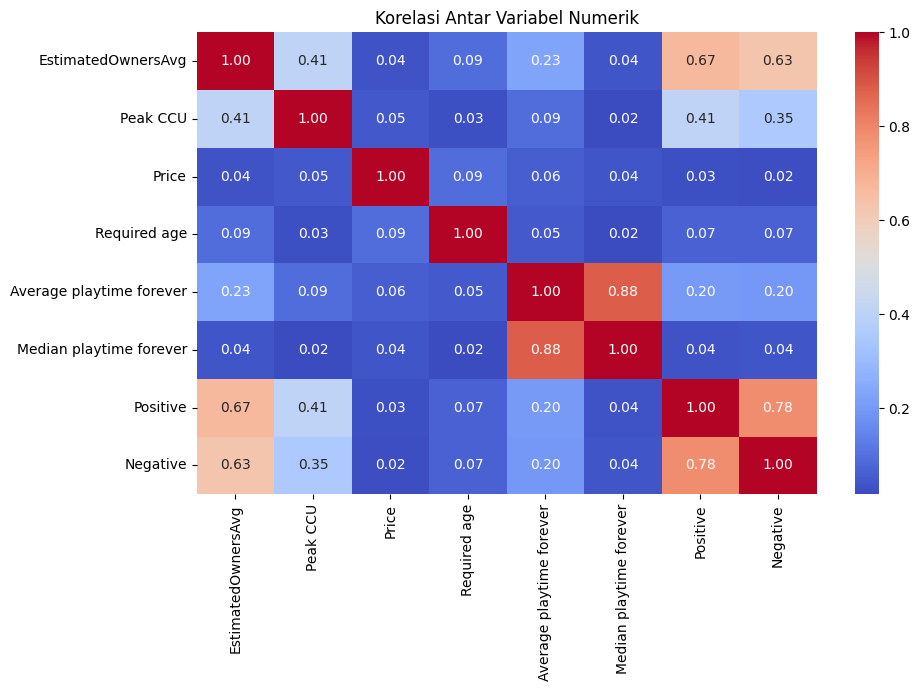

In [7]:
numeric_cols = ["EstimatedOwnersAvg", "Peak CCU", "Price", "Required age", "Average playtime forever", "Median playtime forever", "Positive", "Negative"]
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

In [8]:
print(df_clean[numeric_cols].corr())

                          EstimatedOwnersAvg  Peak CCU     Price  \
EstimatedOwnersAvg                  1.000000  0.407431  0.035079   
Peak CCU                            0.407431  1.000000  0.045973   
Price                               0.035079  0.045973  1.000000   
Required age                        0.091981  0.025420  0.092100   
Average playtime forever            0.230012  0.092089  0.057227   
Median playtime forever             0.038367  0.017505  0.038195   
Positive                            0.667808  0.408919  0.028097   
Negative                            0.627945  0.354604  0.024771   

                          Required age  Average playtime forever  \
EstimatedOwnersAvg            0.091981                  0.230012   
Peak CCU                      0.025420                  0.092089   
Price                         0.092100                  0.057227   
Required age                  1.000000                  0.051255   
Average playtime forever      0.051255         

In [9]:
df_clean

,Peak CCU,Required age,Price,DiscountDLC count,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,EstimatedOwnersAvg,release_year
0,0,0,19.99,0,6,11,0.0,0.0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",10000,2008.0
1,0,0,0.99,0,53,5,0.0,0.0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",10000,2017.0
2,0,0,4.99,0,0,0,0.0,0.0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",[],10000,2021.0
3,0,0,5.99,0,3,0,0.0,0.0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",10000,2020.0
4,0,0,0.00,0,50,8,0.0,0.0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",10000,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111470,0,0,2.99,0,5,0,0.0,0.0,Webcess,Webcess,"[Single-player, Full controller support, Steam...","[Action, Casual, Indie]","[Action Roguelike, Bullet Hell, Hack and Slash...",10000,2025.0
111471,0,0,2.69,0,0,0,0.0,0.0,Hentai Panda,Hentai Panda,"[Single-player, Steam Achievements, Steam Clou...","[Casual, Indie]",[],10000,2025.0
111472,0,0,7.99,0,24,12,0.0,0.0,Sinka Games,"Sinka Games,Arkuda Inc.","[Single-player, Family Sharing]",[Simulation],"[Simulation, Walking Simulator, Idler, First-P...",10000,2025.0
111473,0,0,0.00,0,0,0,0.0,0.0,AccuBow LLC,AccuBow LLC,"[Single-player, Tracked Controller Support, VR...","[Action, Adventure, Free To Play]",[],0,2025.0


In [10]:
df_clean = preprocess(df_raw)

d:\Repo\DATATHON\steam_game_popularity_predictor\src\preprocessing.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")


In [16]:
from src.preprocessing import feature_engineering

X, y = feature_engineering(df_clean, use_embedding=False)

In [4]:
from src.preprocessing import preprocess
from src.preprocessing import feature_engineering

df_raw = pd.read_csv("../data/games_selected.csv")
df_clean = preprocess(df_raw, use_text_embedding=False)
X, y = feature_engineering(df_clean, use_embedding=False)

C:\Users\Yuurei\AppData\Local\Temp\ipykernel_50912\2053689603.py:4: DtypeWarning: Columns (0,4,5,6,7,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("../data/games_selected.csv")
d:\Repo\DATATHON\steam_game_popularity_predictor\src\preprocessing.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")


In [5]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (111452, 539)
Shape of y: (111452,)


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)  # misalnya 10 baris
display(X.head())  # Jupyter Notebook

,Price,Peak CCU,Required age,Average playtime forever,Median playtime forever,Positive,Negative,release_year,Dev_encoded,tag_1980s,tag_1990's,tag_2.5D,tag_2D,tag_2D Fighter,tag_2D Platformer,tag_360 Video,tag_3D,tag_3D Fighter,tag_3D Platformer,tag_3D Vision,tag_4 Player Local,tag_4X,tag_6DOF,tag_8-bit Music,tag_ATV,tag_Abstract,tag_Action,tag_Action RPG,tag_Action RTS,tag_Action Roguelike,tag_Action-Adventure,tag_Addictive,tag_Adventure,tag_Agriculture,tag_Aliens,tag_Alternate History,tag_Ambient,tag_America,tag_Animation & Modeling,tag_Anime,tag_Arcade,tag_Archery,tag_Arena Shooter,tag_Artificial Intelligence,tag_Assassin,tag_Asymmetric VR,tag_Asynchronous Multiplayer,tag_Atmospheric,tag_Audio Production,tag_Auto Battler,tag_Automation,tag_Automobile Sim,tag_BMX,tag_Base-Building,tag_Baseball,tag_Based On A Novel,tag_Basketball,tag_Batman,tag_Battle Royale,tag_Beat 'em up,tag_Beautiful,tag_Benchmark,tag_Bikes,tag_Birds,tag_Blood,tag_Board Game,tag_Boomer Shooter,tag_Boss Rush,tag_Bowling,tag_Boxing,tag_Building,tag_Bullet Hell,tag_Bullet Time,tag_CRPG,tag_Capitalism,tag_Card Battler,tag_Card Game,tag_Cartoon,tag_Cartoony,tag_Casual,tag_Cats,tag_Character Action Game,tag_Character Customization,tag_Chess,tag_Choices Matter,tag_Choose Your Own Adventure,tag_Cinematic,tag_City Builder,tag_Class-Based,tag_Classic,tag_Clicker,tag_Co-op,tag_Co-op Campaign,tag_Coding,tag_Cold War,tag_Collectathon,tag_Colony Sim,tag_Colorful,tag_Combat,tag_Combat Racing,tag_Comedy,tag_Comic Book,tag_Competitive,tag_Conspiracy,tag_Controller,tag_Conversation,tag_Cooking,tag_Cozy,tag_Crafting,tag_Creature Collector,tag_Cricket,tag_Crime,tag_Crowdfunded,tag_Cult Classic,tag_Cute,tag_Cyberpunk,tag_Cycling,tag_Dark,tag_Dark Comedy,tag_Dark Fantasy,tag_Dark Humor,tag_Dating Sim,tag_Deckbuilding,tag_Demons,tag_Design & Illustration,tag_Destruction,tag_Detective,tag_Dice,tag_Difficult,tag_Dinosaurs,tag_Diplomacy,tag_Documentary,tag_Dog,tag_Dragons,tag_Drama,tag_Driving,tag_Dungeon Crawler,tag_Dungeons & Dragons,tag_Dwarf,tag_Dynamic Narration,tag_Dystopian,tag_Early Access,tag_Economy,tag_Education,tag_Electronic,tag_Electronic Music,tag_Elf,tag_Emotional,tag_Epic,tag_Episodic,tag_Escape Room,tag_Experience,tag_Experimental,tag_Exploration,tag_Extraction Shooter,tag_FMV,tag_FPS,tag_Faith,tag_Family Friendly,tag_Fantasy,tag_Farming,tag_Farming Sim,tag_Fast-Paced,tag_Feature Film,tag_Female Protagonist,tag_Fighting,tag_First-Person,tag_Fishing,tag_Flight,tag_Football,tag_Football (American),tag_Football (Soccer),tag_Foreign,tag_Fox,tag_Free to Play,tag_Funny,tag_Futuristic,tag_Gambling,tag_Game Development,tag_GameMaker,tag_Games Workshop,tag_Gaming,tag_God Game,tag_Golf,tag_Gore,tag_Gothic,tag_Grand Strategy,tag_Great Soundtrack,tag_Grid-Based Movement,tag_Gun Customization,tag_Hack and Slash,tag_Hacking,tag_Hand-drawn,tag_Hardware,tag_Heist,tag_Hentai,tag_Hero Shooter,tag_Hex Grid,tag_Hidden Object,tag_Historical,tag_Hobby Sim,tag_Hockey,tag_Horror,tag_Horses,tag_Hunting,tag_Idler,tag_Illuminati,tag_Immersive,tag_Immersive Sim,tag_Indie,tag_Instrumental Music,tag_Intentionally Awkward Controls,tag_Interactive Fiction,tag_Inventory Management,tag_Investigation,tag_Isometric,tag_JRPG,tag_Jet,tag_Job Simulator,tag_Jump Scare,tag_Kickstarter,tag_LEGO,tag_LGBTQ+,tag_Lara Croft,tag_Lemmings,tag_Level Editor,tag_Life Sim,tag_Linear,tag_Local Co-Op,tag_Local Multiplayer,tag_Logic,tag_Loot,tag_Looter Shooter,tag_Lore-Rich,tag_Lovecraftian,tag_MMORPG,tag_MOBA,tag_Magic,tag_Mahjong,tag_Management,tag_Mars,tag_Martial Arts,tag_Massively Multiplayer,tag_Masterpiece,tag_Match 3,tag_Mature,tag_Mechs,tag_Medical Sim,tag_Medieval,tag_Memes,tag_Metroidvania,tag_Military,tag_Mini Golf,tag_Minigames,tag_Minimalist,tag_Mining,tag_Mod,tag_Moddable,tag_Modern,tag_Motocross,tag_Motorbike,tag_Mouse only,tag_Movie,tag_Multiplayer,tag_Multiple Endings,tag_Music,tag_Music-Based Procedural Generation,tag_Musou,tag_Mystery,tag_Mystery Dungeon,tag_Mythology,tag_NSFW,tag_Narration,tag_Nar